<a href="https://colab.research.google.com/github/chelynl/Machine_Learning/blob/main/15_Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reinforcement Learning**
- Upper Confidence Bound (UCB)
- Thompson Sampling

These models are used for decision making where the data observed up to time t is considered to decide which action to take at time t + 1.

## Multi-Armed Bandit Problem (use-case example):
- There are X number of potential actions to take. 
- Each action is associated with an unknown, underlying distribution that determines the result. 
- We have to choose the action that gives optimal results.
- This can be done by combining exploration of these actions with their exploitation in order to find the best action asap (maximize output of our efforts)
- Ex/ advertising
- You could run an A/B test to find the best action but then you have to do exploration and exploitation separately (requires more money/time)

## Multi-Armed Bandit for Advertising
- We have *d* arms (arms = ads that we display to users each time they connect to a web page).
- Each time a user connects to this web page, that makes a round.
- At each round *n*, we choose one ad to display to the user.
- At each round *n*, ad *i* gives reward $r_i(n)=1$ if the user clicked on the ad *i* or $r_i(n)=0$ if the user didn't.
- Our goal is to maximize the total reward we get over many rounds.


# **Upper Confidence Bound (UCB) Model**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

Want to know which ad will result in more sales from customer

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/chelynl/ML_notes/main/reinforcement_learning/Ads_CTR_Optimisation.csv?token=AMGO4MHC57WN4UH2VPPZ2JDA2TFSG')
df

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [5]:
# Number of rounds
N = 10000
# Number of ads
d = 10

ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0

for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = df.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

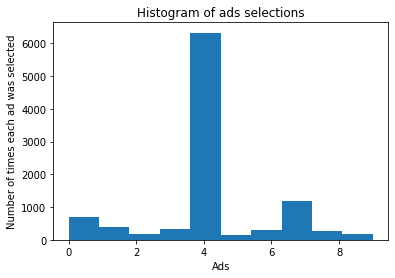

In [6]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

# **Thompson Sampling**

In [12]:
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = df.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

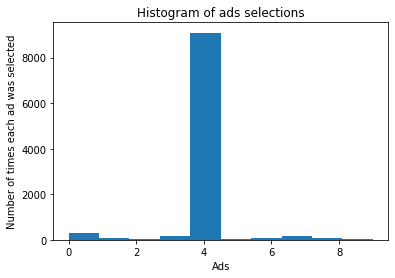

In [13]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()